# 💼 LandIt: Predicting Time to Land a Data Science Job  
**Version 1 – Dummy Data Generator**  
📍 *Author: [Tanvi Pradhan]*  
🧠 *Description: Creates synthetic yet realistic job-seeker profiles to train a regression model predicting time-to-hire for aspiring data professionals.*


In [ ]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import random
import os

# 2. Set Random Seed (optional — for consistent results across runs)
random.seed(25)
np.random.seed(25)

# 3. Define Options for Each Column
degree_fields = [
    'DS',
    'CS',
    'Mechanical Engineering',
    'Civil Engineering',
    'Electrical Engineering',
    'Arts',
    'Commerce',
    'Other'
]

degree_levels = ['Bachelors', 'Masters', 'PhD']
specialization_tracks = ['ML', 'BI', 'NLP', 'Data Engineering']
job_channels = ['referral', 'direct_application', 'recruiter_outreach', 'networking_event', 'internship_conversion']
job_portals = ['glassdoor', 'wellfound', 'company_website', 'upwork', 'fiverr', 'other']
countries = ['India', 'USA', 'Germany', 'Canada', 'Australia', 'Brazil', 'Egypt']
regions = {
    'India': 'Asia',
    'USA': 'North America',
    'Germany': 'Europe',
    'Canada': 'North America',
    'Australia': 'Oceania',
    'Brazil': 'LATAM',
    'Egypt': 'MENA'
}
job_types = ['remote', 'in_person', 'hybrid']

# 4. Helper Functions

# Assign a job portal only if the application was direct
def assign_job_portal(channel):
    if channel == 'direct_application':
        return random.choice(job_portals)
    else:
        return 'N/A'

# Make sure everyone gets a job
def assign_got_job():
    return True

# Generate job landing time (in months) between 1 and 18

def generate_time_to_job():
    return random.choices(
        population=list(range(1, 19)),  # Months 1 to 18
        weights=[
            12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1
        ]
    )[0]


# 5. Generate Data
data = []

for _ in range(50):  # You can change this number for more rows
    degree_field = random.choice(degree_fields)
    degree_level = random.choice(degree_levels)
    has_certificates = random.choice([True, False])
    has_internship = random.choice([True, False])
    has_freelance_or_parttime = random.choice([True, False])
    
    # Smart career gap logic
    career_gap_years = np.random.choice(
        [0, 1, 2, 3, 4, 5, 6], 
        p=[0.35, 0.15, 0.15, 0.12, 0.10, 0.08, 0.05]
    )
    if career_gap_years > 0:
        has_certificates = random.choices([True, False], weights=[0.7, 0.3])[0]
        has_freelance_or_parttime = random.choices([True, False], weights=[0.5, 0.5])[0]

    job_search_hours_per_week = random.randint(5, 30)
    specialization_track = random.choice(specialization_tracks)
    job_acquisition_channel = random.choice(job_channels)
    job_portal = assign_job_portal(job_acquisition_channel)

    country_of_residence = random.choice(countries)
    region_of_residence = regions[country_of_residence]
    job_location_country = random.choice(countries)
    region_of_job = regions[job_location_country]
    job_type = random.choice(job_types)
    
    got_job = assign_got_job()
    job_landing_time_months = generate_time_to_job()


    data.append([
        degree_field,
        degree_level,
        has_certificates,
        has_internship,
        has_freelance_or_parttime,
        career_gap_years,
        job_search_hours_per_week,
        specialization_track,
        job_acquisition_channel,
        job_portal,
        country_of_residence,
        region_of_residence,
        job_location_country,
        region_of_job,
        job_type,
        got_job,
        job_landing_time_months
    ])

# 6. Create DataFrame
columns = [
    'degree_field',
    'degree_level',
    'has_certificates',
    'has_internship',
    'has_freelance_or_parttime',
    'career_gap_years',
    'job_search_hours_per_week',
    'specialization_track',
    'job_acquisition_channel',
    'job_portal',
    'country_of_residence',
    'region_of_residence',
    'job_location_country',
    'region_of_job',
    'job_type',
    'got_job',
    'job_landing_time_months'
]

df = pd.DataFrame(data, columns=columns)

# 7. Save to CSV
os.makedirs('data', exist_ok=True)  # Make sure 'data/' folder exists
df.to_csv('data/data_science_job_seekers.csv', index=False)  # Save CSV (no row numbers)

print("✅ Dummy dataset created and saved as 'data/data_science_job_seekers.csv'")


✅ Dummy dataset created and saved as 'data/data_science_job_seekers.csv'


In [2]:
## 🧪 Exploratory Data Analysis (EDA) – Part 1: Data Overview + Cleaning


### 🧠 Step 1: Dataset Info


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   degree_field               50 non-null     object
 1   degree_level               50 non-null     object
 2   has_certificates           50 non-null     bool  
 3   has_internship             50 non-null     bool  
 4   has_freelance_or_parttime  50 non-null     bool  
 5   career_gap_years           50 non-null     int32 
 6   job_search_hours_per_week  50 non-null     int64 
 7   specialization_track       50 non-null     object
 8   job_acquisition_channel    50 non-null     object
 9   job_portal                 50 non-null     object
 10  country_of_residence       50 non-null     object
 11  region_of_residence        50 non-null     object
 12  job_location_country       50 non-null     object
 13  region_of_job              50 non-null     object
 14  job_type    

In [3]:
df.head()


,degree_field,degree_level,has_certificates,has_internship,has_freelance_or_parttime,career_gap_years,job_search_hours_per_week,specialization_track,job_acquisition_channel,job_portal,country_of_residence,region_of_residence,job_location_country,region_of_job,job_type,got_job,job_landing_time_months
0,Commerce,Bachelors,True,False,False,5,13,ML,recruiter_outreach,N/A,Australia,Oceania,Canada,North America,remote,True,6
1,CS,PhD,True,False,False,2,21,ML,referral,N/A,Australia,Oceania,Australia,Oceania,in_person,True,4
2,Civil Engineering,PhD,True,False,True,0,7,Data Engineering,internship_conversion,N/A,India,Asia,Australia,Oceania,hybrid,True,1
3,DS,PhD,True,True,True,0,29,Data Engineering,internship_conversion,N/A,Canada,North America,Canada,North America,in_person,True,6
4,Other,Masters,True,False,False,1,17,Data Engineering,referral,N/A,Canada,North America,USA,North America,in_person,True,6


In [4]:
df.describe()


,career_gap_years,job_search_hours_per_week,job_landing_time_months
count,50.000000,50.000000,50.000000
mean,1.820000,16.960000,4.700000
std,1.674417,7.450407,3.234066
min,0.000000,5.000000,1.000000
25%,0.250000,11.000000,2.000000
50%,2.000000,17.000000,4.000000
75%,2.750000,21.750000,7.000000
max,6.000000,29.000000,11.000000


In [5]:
null_summary = df.isnull().sum()
print(null_summary)


degree_field                 0
degree_level                 0
has_certificates             0
has_internship               0
has_freelance_or_parttime    0
career_gap_years             0
job_search_hours_per_week    0
specialization_track         0
job_acquisition_channel      0
job_portal                   0
country_of_residence         0
region_of_residence          0
job_location_country         0
region_of_job                0
job_type                     0
got_job                      0
job_landing_time_months      0
dtype: int64


In [6]:
# Fill categorical columns with 'N/A'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("N/A")

# Fill numeric columns with median value
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)


In [7]:
cleaned_null_summary = df.isnull().sum()
print(cleaned_null_summary)


degree_field                 0
degree_level                 0
has_certificates             0
has_internship               0
has_freelance_or_parttime    0
career_gap_years             0
job_search_hours_per_week    0
specialization_track         0
job_acquisition_channel      0
job_portal                   0
country_of_residence         0
region_of_residence          0
job_location_country         0
region_of_job                0
job_type                     0
got_job                      0
job_landing_time_months      0
dtype: int64


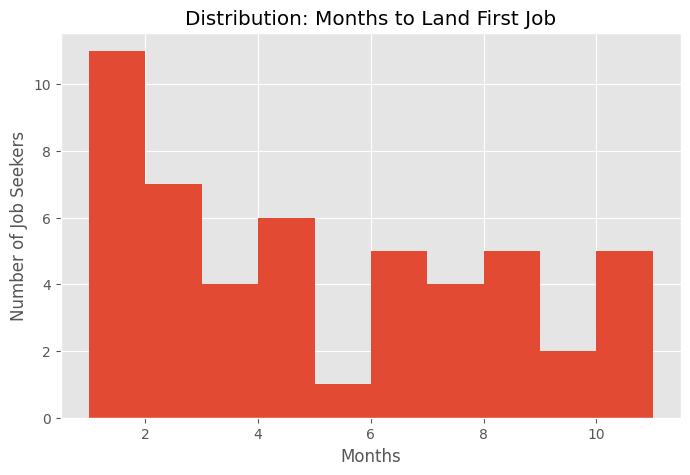

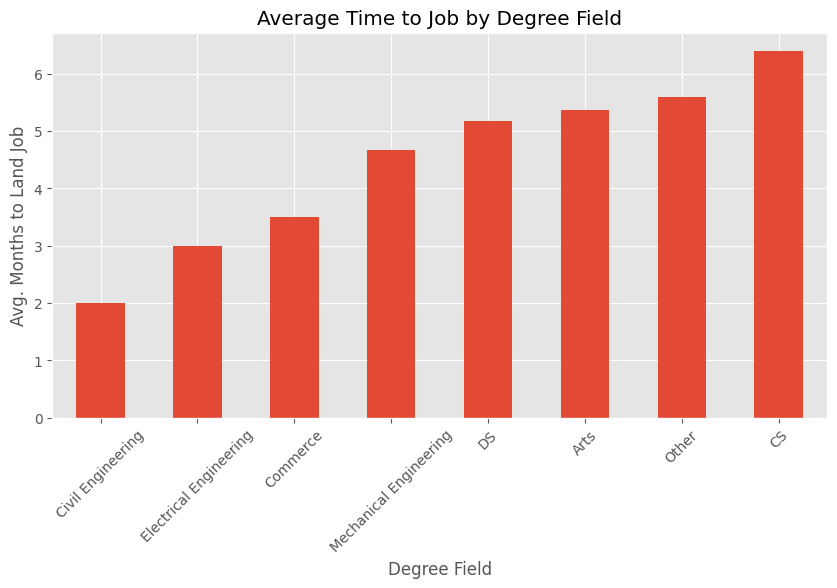

<Figure size 700x500 with 0 Axes>

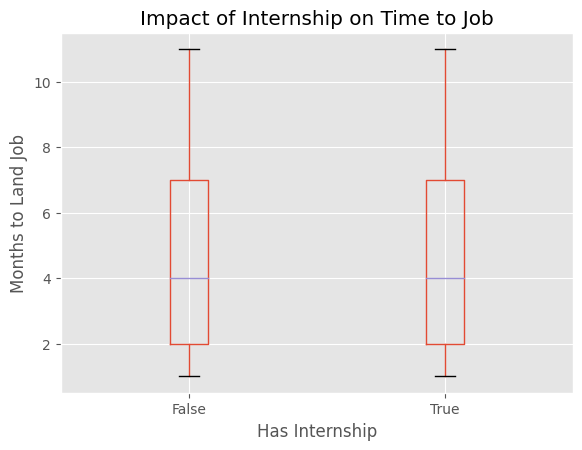

In [8]:
# 📦 Step 1: Import matplotlib
import matplotlib.pyplot as plt

# Optional: prettier visuals
plt.style.use('ggplot')

# 📊 1. Histogram: How long it takes to land a job
plt.figure(figsize=(8, 5))
df['job_landing_time_months'].hist(bins=10)
plt.title('Distribution: Months to Land First Job')
plt.xlabel('Months')
plt.ylabel('Number of Job Seekers')
plt.grid(True)
plt.show()

# 📊 2. Bar Chart: Avg job time by degree field
plt.figure(figsize=(10, 5))
df.groupby('degree_field')['job_landing_time_months'].mean().sort_values().plot(kind='bar')
plt.title('Average Time to Job by Degree Field')
plt.ylabel('Avg. Months to Land Job')
plt.xlabel('Degree Field')
plt.xticks(rotation=45)
plt.show()

# 📊 3. Boxplot: Internship vs. Job Landing Time
plt.figure(figsize=(7, 5))
df.boxplot(column='job_landing_time_months', by='has_internship')
plt.title('Impact of Internship on Time to Job')
plt.suptitle('')  # Hides default title
plt.xlabel('Has Internship')
plt.ylabel('Months to Land Job')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Split into X and y
X = df.drop(columns=['job_landing_time_months'])
y = df['job_landing_time_months']

# 2. Define categorical columns to encode
categorical_features = X.select_dtypes(include='object').columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

# 3. One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric columns as-is
)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 5. Combine preprocessor and model into a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 6. Train the model
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)

# 8. Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 29.86
Root Mean Squared Error (RMSE): 34.76


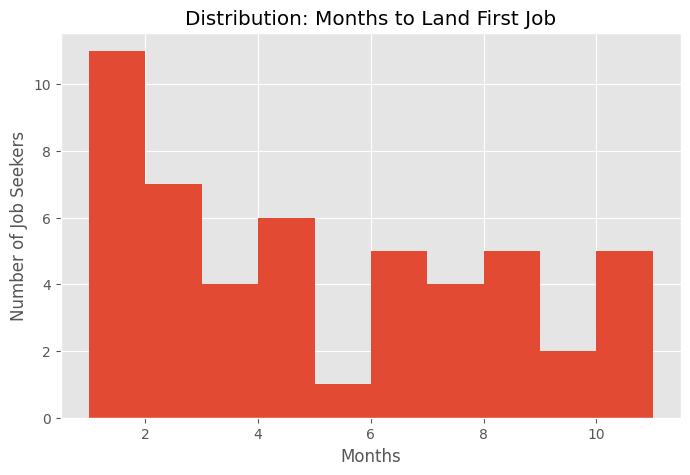

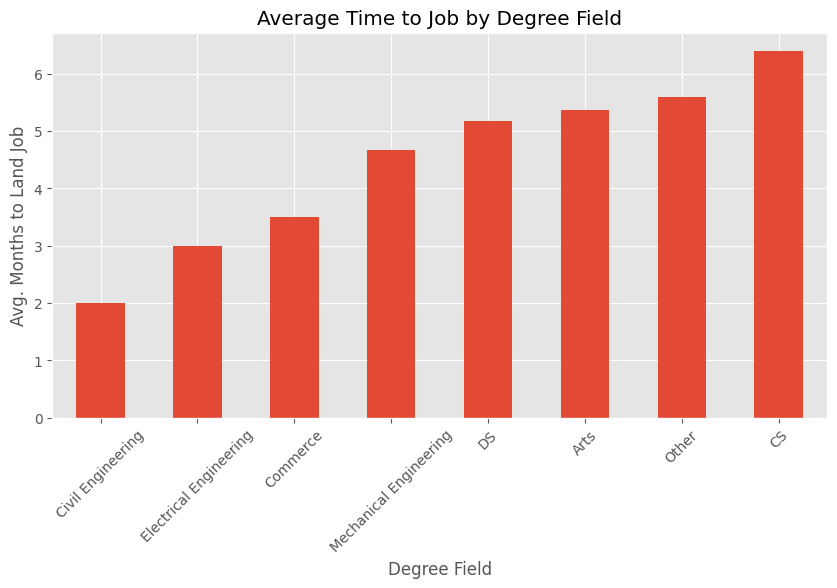

<Figure size 700x500 with 0 Axes>

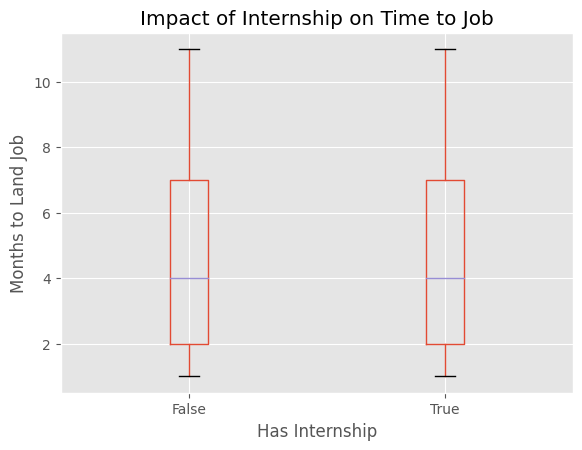

In [11]:
import os
import matplotlib.pyplot as plt

# ✅ Create 'visuals' folder if it doesn't exist
os.makedirs('visuals', exist_ok=True)

# 🎯 1. Histogram: Job Landing Time Distribution
plt.figure(figsize=(8, 5))
df['job_landing_time_months'].hist(bins=10)
plt.title('Distribution: Months to Land First Job')
plt.xlabel('Months')
plt.ylabel('Number of Job Seekers')
plt.grid(True)
plt.savefig("visuals/plot_job_landing_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# 🎯 2. Bar Chart: Avg Job Time by Degree Field
plt.figure(figsize=(10, 5))
df.groupby('degree_field')['job_landing_time_months'].mean().sort_values().plot(kind='bar')
plt.title('Average Time to Job by Degree Field')
plt.ylabel('Avg. Months to Land Job')
plt.xlabel('Degree Field')
plt.xticks(rotation=45)
plt.savefig("visuals/plot_degree_vs_time.png", dpi=300, bbox_inches="tight")
plt.show()

# 🎯 3. Boxplot: Internship vs Job Landing Time
plt.figure(figsize=(7, 5))
df.boxplot(column='job_landing_time_months', by='has_internship')
plt.title('Impact of Internship on Time to Job')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Has Internship')
plt.ylabel('Months to Land Job')
plt.savefig("visuals/plot_internship_impact.png", dpi=300, bbox_inches="tight")
plt.show()
